In [71]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Изначально импортируем необходимые библиотеки с прочитаем данные таблицы. В качестве моделей выберем CatBoostClassifier и модель OLS

In [1]:
import statsmodels.api as sm
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('C:\\Users\\sea23\\Desktop\\институт\\4 курс\\7 семестр\\Machine learning\\дз\\train_dataset_train.csv')
df.head()

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label
0,1,40BD89EC85646EFB69E283F39C298E60,Пропуск FacePay,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,8001
1,2,126727A96489CC976A8C08E5CEB00542,СК учащегося 30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,9011
2,3,D28CE6A9E0E5B6D213470A97CFF32485,БСК дружинника г.Москвы,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,7022
3,4,015DA44B523C062B5BFEFF3FB0E64B9E,30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:13,1048.233333,2022
4,5,95B19C6F3A504727AC3EA56EB7E3E80F,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:02:55,965.600000,2017


Рассмотрим его подробнее, а именно размер, число уникальных значений и скажем о смысле каждой колонки

In [3]:
df.describe(include='all')

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label
count,1.091021e+06,1091021,1091021,1.091021e+06,1091021,1.091021e+06,1091021,1.091021e+06,1091021,1091021,1.091021e+06,1.091021e+06
unique,NaN,335533,60,NaN,426,NaN,245,NaN,16,297040,NaN,NaN
top,NaN,7992E92F9AE0F7506BD439547FD7E11F,КОШЕЛЕК,NaN,Щёлковская ( Северный ),NaN,Щёлковская,NaN,Таганско-Краснопресненская,2022-09-12 08:20:09,NaN,NaN
freq,NaN,8,262499,NaN,17810,NaN,22133,NaN,156031,29,NaN,NaN
mean,5.455110e+05,NaN,NaN,8.581884e+02,NaN,8.601452e+03,NaN,8.590013e+00,NaN,NaN,5.104668e+02,7.723527e+03
std,3.149508e+05,NaN,NaN,9.003577e+02,NaN,1.247133e+04,NaN,1.247157e+01,NaN,NaN,2.328452e+02,1.167015e+04
min,1.000000e+00,NaN,NaN,2.000000e+01,NaN,1.002000e+03,NaN,1.000000e+00,NaN,NaN,3.001667e+01,1.002000e+03
25%,2.727560e+05,NaN,NaN,2.150000e+02,NaN,3.018000e+03,NaN,3.000000e+00,NaN,NaN,3.229500e+02,3.006000e+03
50%,5.455110e+05,NaN,NaN,3.370000e+02,NaN,7.009000e+03,NaN,7.000000e+00,NaN,NaN,5.686833e+02,6.013000e+03
75%,8.182660e+05,NaN,NaN,2.087000e+03,NaN,9.022000e+03,NaN,9.000000e+00,NaN,NaN,6.838833e+02,9.012000e+03


Исходя из  общего описания таблицы, можно сделать вывод о том, что данные ticket_id не применимы в условиях решения нашей задачи. Также удалим дублирующие колонки.

In [4]:
df.drop(columns=['entrance_id','station_id','line_id','id'],inplace=True)

Глянем на пропуски и удалим если они есть

In [5]:
df.isnull().sum()

ticket_id         0
ticket_type_nm    0
entrance_nm       0
station_nm        0
line_nm           0
pass_dttm         0
time_to_under     0
label             0
dtype: int64

In [6]:
df.dropna(inplace=True)

Так как id билета для каждого пользователя уникален, то нет смысла его оставлять в обучающей выборки - удалим его.

In [7]:
df.drop(columns=['ticket_id'], inplace=True)

Обработка таблицы закончена, приступим к задаче регрессии для предсказания времени следующей валидации

<AxesSubplot:>

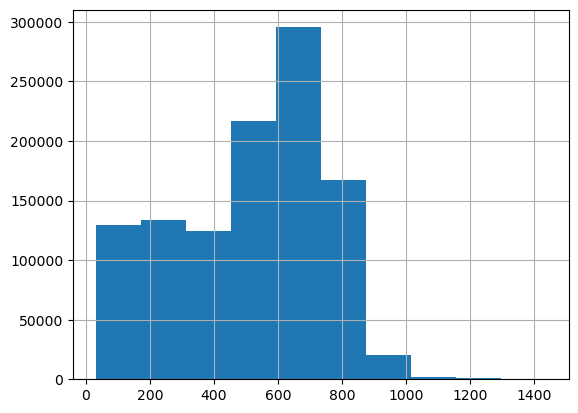

In [21]:
df['time_to_under'].hist()

In [ ]:
Создадим функцию для приведения таблицы к единому виду:

In [8]:
def time_preprocess_r(df):
    df['day'] = df.pass_dttm.dt.dayofweek #день недели
    df['hour'] = df.pass_dttm.dt.hour # час в формате 24
    df['workday'] = df['day'].apply(lambda x: 0 if x == 5 or x == 6 else 1)
    df = df.drop(columns=['pass_dttm','entrance_nm','station_nm','line_nm','ticket_type_nm','label'])
    return df

In [ ]:
Далее предскажем время следующей валидации с помощью OLS

In [9]:
df.pass_dttm = pd.to_datetime(df.pass_dttm)
df = sm.add_constant(df)
x_regress_train, x_regress_test, y_regress_train, y_regress_test = train_test_split(df.drop(columns=['time_to_under']), df[['time_to_under']], test_size=0.3)
x_regress_train = time_preprocess_r(x_regress_train)
x_regress_test = time_preprocess_r(x_regress_test)

model_regression = sm.OLS(y_regress_train,x_regress_train)
model_regression=model_regression.fit()
forecast_regression= model_regression.predict(x_regress_test)

Далее решим задачу классификации:

In [11]:
def time_preprocess_c(df):
    df['day'] = df.pass_dttm.dt.dayofweek #день недели
    df['hour'] = df.pass_dttm.dt.hour # час в формате 24
    df['workday'] = df['day'].apply(lambda x: 0 if x == 5 or x == 6 else 1)

   # df['name_workday'] = df['day'].apply(lambda x : 'holiday' if x == 5 or x ==6  else 'work')

    df = df.drop(columns=['pass_dttm','day','hour'])
    return df

In [ ]:
Возьмем для обучения 10000 строк, создадим таблицу из этих значений, преобразуем к специальному виду и предскажем для 250 строк.

In [17]:
df.pass_dttm = pd.to_datetime(df.pass_dttm)

x_class_train = df.drop(columns=['label'])[:10000]
y_class_train = df[['label']][:10000]


test_class = df.loc[df.ticket_type_nm.isin(x_class_train.ticket_type_nm)&
                    df.entrance_nm.isin(x_class_train.entrance_nm) &
                    df.station_nm.isin(x_class_train.station_nm) &
                    df.line_nm.isin(x_class_train.line_nm) ]

x_class_test = test_class.drop(columns=['label'])[-250:]
y_class_test = test_class[['label']][-250:]

x_class_train = time_preprocess_c(x_class_train)
x_class_test = time_preprocess_c(x_class_test)


model_class = CatBoostClassifier(iterations = 10)
model_class.fit(x_class_train,y_class_train, cat_features=['workday','ticket_type_nm','entrance_nm','station_nm','line_nm'])
forecast_class= model_class.predict(x_class_test)


Learning rate set to 0.5
0:	learn: 5.3375006	total: 1m 25s	remaining: 12m 45s
1:	learn: 5.1560095	total: 2m 48s	remaining: 11m 12s
2:	learn: 5.1692189	total: 4m 11s	remaining: 9m 47s
3:	learn: 4.9770172	total: 5m 35s	remaining: 8m 22s
4:	learn: 4.8987697	total: 6m 57s	remaining: 6m 57s
5:	learn: 4.8018424	total: 8m 22s	remaining: 5m 35s
6:	learn: 4.7751913	total: 9m 49s	remaining: 4m 12s
7:	learn: 4.7359671	total: 11m 14s	remaining: 2m 48s
8:	learn: 4.6597006	total: 12m 38s	remaining: 1m 24s
9:	learn: 4.6385967	total: 14m 9s	remaining: 0us


Расчитаем необходимые метрики

In [18]:
from sklearn.metrics import r2_score, recall_score, mean_absolute_percentage_error
def result(actual_class, forecast_class, actual_regress, forecast_regress):
    print(r2_score(actual_regress, forecast_regress))
    print(recall_score(actual_class, forecast_class, average='micro'))
    return 0.5 * r2_score(actual_regress, forecast_regress) + 0.5 * recall_score(actual_class, forecast_class, average='micro')


In [19]:
print('result: ', result(y_class_test, forecast_class, y_regress_test, forecast_regression))

0.46381549846365655
0.012
result:  0.23790774923182828
